In [1]:
from sklearn.datasets import load_digits
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
from sklearn import tree
import graphviz 
from sklearn.tree import export_text

digits = load_digits()
print(digits.data.shape)


# plt.gray() 
# plt.matshow(digits.images[0]) 
# plt.show() 
print(np.max(digits.images))
print(digits.data.shape)
print(digits.data[0])
print(digits.images.shape)
print(digits.images[0])

(1797, 64)
16.0
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [2]:
n_samples = len(digits.images)
data = digits.data


X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.1, shuffle=False)


In [3]:
clf = LogisticRegression(random_state=0, max_iter=5000).fit(X_train, y_train)

score = clf.score(X_train, y_train)
print("Train Score: ",score)

predict = clf.predict(X_test[:])
print(predict)

score = clf.score(X_test, y_test)
print("Test Score: ",score)

Train Score:  1.0
[5 2 8 0 1 7 6 3 2 1 7 9 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7
 2 2 5 7 8 5 9 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 8 4 5 6 7 8 9 0 1 2 8
 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 8 8
 7 5 8 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4
 5 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]
Test Score:  0.9444444444444444


In [76]:
tree_clf = tree.DecisionTreeClassifier(
    max_features=64,
    max_depth=10,
    criterion="entropy",
    min_samples_split=8
)
tree_clf = tree_clf.fit(X_train, y_train)

print("Depth: ", tree_clf.get_depth())
print("N Leaves: ", tree_clf.get_n_leaves())

tree_score = tree_clf.score(X_train, y_train)
print("Decision Tree Train Score: ",tree_score)

tree_clf.predict(X_test)
tree_score = tree_clf.score(X_test, y_test)
print("Decision Tree Score: ",tree_score)
# tree.plot_tree(tree_clf, fontsize=12)
# plt.show()

Depth:  9
N Leaves:  83
Decision Tree Train Score:  0.9666048237476809
Decision Tree Score:  0.8388888888888889


In [55]:
r = export_text(tree_clf)
print(r)

|--- feature_42 <= 7.50
|   |--- feature_26 <= 9.50
|   |   |--- feature_43 <= 2.50
|   |   |   |--- feature_30 <= 1.50
|   |   |   |   |--- feature_19 <= 8.50
|   |   |   |   |   |--- feature_29 <= 13.50
|   |   |   |   |   |   |--- feature_45 <= 4.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_45 >  4.50
|   |   |   |   |   |   |   |--- feature_4 <= 7.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_4 >  7.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_29 >  13.50
|   |   |   |   |   |   |--- feature_2 <= 8.50
|   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |--- feature_2 >  8.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_19 >  8.50
|   |   |   |   |   |--- feature_44 <= 3.50
|   |   |   |   |   |   |--- feature_29 <= 7.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_29 >  7.50
|   |   |   |   | 

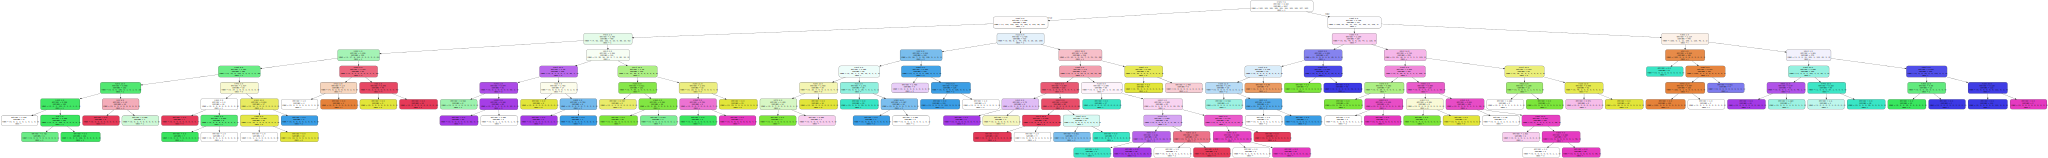

In [48]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     class_names=str(digits.target_names),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [7]:
def plot_confusionMatrix(cld, X_test, y_test):
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Confusion matrix:\n{disp.confusion_matrix}")

    plt.show()

In [8]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    print(np.min(X), np.max(X))
    print(X)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})


def plot_tsne(X_train):
    X_embedded = TSNE(n_components=2).fit_transform(X_train)
    print(X_embedded)
    print(X_embedded.shape)
    plot_embedding(X_embedded, digits.target, "TSNE dos digitos")
    plt.show()

In [92]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis()
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.9555555555555556


In [91]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Number of mislabeled points out of a total 180 points : 34
Accuracy: 0.8111111111111111


In [90]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9222222222222223
